###Importing Necessary Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

###Uploading the Dataset from UCI Library

In [12]:
from google.colab import files
uploaded = files.upload()

Saving magic04.data to magic04.data


In [19]:
dataset = pd.read_csv('magic04.data',names=('fNames','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','Class'))
dataset.head()

,fNames,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


###Pre-Processing of Dataset

In [20]:
dataset.shape

(19020, 11)

In [21]:
dataset.isnull().sum()

fNames      0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
Class       0
dtype: int64

<Axes: xlabel='Class', ylabel='count'>

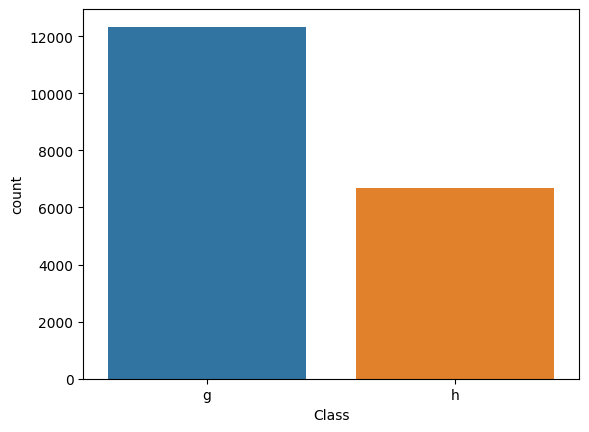

In [22]:
sns.countplot(x = 'Class', data=dataset)

In [23]:
X = dataset.iloc[:,0:-1]
y = dataset['Class']

In [24]:
ss = StandardScaler()
ss.fit_transform(X)

array([[-0.57722602, -0.33680419, -0.38113037, ..., -0.40584194,
         0.47681587, -1.49786555],
       [-0.51096889, -0.57002666, -0.64859479, ..., -0.49009359,
        -0.81541816,  0.15312459],
       [ 2.56827756,  6.20585836,  2.61578306, ..., -2.18302986,
         1.88922413,  0.84263513],
       ...,
       [ 0.52392318,  1.38177927,  1.31887687, ..., -0.4665087 ,
         0.10163583,  0.83900338],
       [ 1.58775746,  2.98278123,  2.47337518, ..., -3.07720555,
         2.18525981,  2.87032093],
       [ 3.16145936,  1.67999288,  0.81314905, ...,  1.49930076,
         0.96101431,  1.05044239]])

###Creation of 10 samples with 70-30 ratio of Training and Testing Set

In [25]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [26]:
samples

[(        fNames   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fM3Trans  \
  12085  27.0149  14.6156  2.5250  0.4507  0.2642 -29.2965 -22.5492   -3.6900   
  169    72.9690  19.2006  3.0080  0.2749  0.1537 -47.3236  42.1489  -10.2088   
  5481   82.6882  33.0604  3.8316  0.0984  0.0580  90.8886  42.9439   12.4878   
  9783   54.3867  18.5857  3.1614  0.2255  0.1134  43.3999  42.1384    4.8725   
  13979  13.1359  10.3390  2.1707  0.8105  0.3960 -19.9577  -3.1469  -17.8402   
  ...        ...      ...     ...     ...     ...      ...      ...       ...   
  9225   34.7527  16.3799  2.6212  0.2703  0.1376  21.9455  23.6607    7.2786   
  13123  40.7440  16.0635  2.8145  0.3108  0.1668  15.8622  36.5069   -6.2138   
  9845   35.8286  16.8952  2.8802  0.3070  0.1746  38.7674  17.2509   11.3048   
  10799  20.0986  12.8671  2.4057  0.4558  0.2417  11.5039   9.7434    7.8750   
  2732   27.2726  12.6129  2.7288  0.3978  0.2512 -10.4679 -17.5545   -9.9008   
  
          fAlpha     fDis

### Creation of a Fitness Function

In [27]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [28]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

### Calling the Function for Every Sample

In [29]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 1)
    gamma = np.random.uniform(0, 1)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.62 Best Kernel =  rbf Best Nu =  0.62 Best Epsilon =  0.07
Best Accuracy =  0.71 Best Kernel =  rbf Best Nu =  0.36 Best Epsilon =  0.69
Best Accuracy =  0.64 Best Kernel =  rbf Best Nu =  0.48 Best Epsilon =  0.25
Best Accuracy =  0.71 Best Kernel =  rbf Best Nu =  0.21 Best Epsilon =  0.92
Best Accuracy =  0.72 Best Kernel =  rbf Best Nu =  0.22 Best Epsilon =  0.75
Best Accuracy =  0.73 Best Kernel =  rbf Best Nu =  0.4 Best Epsilon =  0.52
Best Accuracy =  0.62 Best Kernel =  rbf Best Nu =  0.86 Best Epsilon =  0.12
Best Accuracy =  0.71 Best Kernel =  rbf Best Nu =  1.0 Best Epsilon =  0.91
Best Accuracy =  0.41 Best Kernel =  rbf Best Nu =  0.97 Best Epsilon =  0.33
Best Accuracy =  0.72 Best Kernel =  rbf Best Nu =  0.3 Best Epsilon =  0.41


###Creation of a Result Table

In [30]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.62,rbf,0.62,0.07
1,2,0.71,rbf,0.36,0.69
2,3,0.64,rbf,0.48,0.25
3,4,0.71,rbf,0.21,0.92
4,5,0.72,rbf,0.22,0.75
5,6,0.73,rbf,0.40,0.52
6,7,0.62,rbf,0.86,0.12
7,8,0.71,rbf,1.00,0.91
8,9,0.41,rbf,0.97,0.33
9,10,0.72,rbf,0.30,0.41


### Plotting of the Convergence Graph/Linear Curve

In [31]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [33]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [34]:
train_sizes

array([  119,   361,   603,   846,  1088,  1330,  1572,  1814,  2056,
        2298,  2540,  2782,  3024,  3266,  3509,  3751,  3993,  4235,
        4477,  4719,  4961,  5203,  5445,  5687,  5929,  6171,  6414,
        6656,  6898,  7140,  7382,  7624,  7866,  8108,  8350,  8592,
        8834,  9076,  9319,  9561,  9803, 10045, 10287, 10529, 10771,
       11013, 11255, 11497, 11739, 11982])

In [35]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

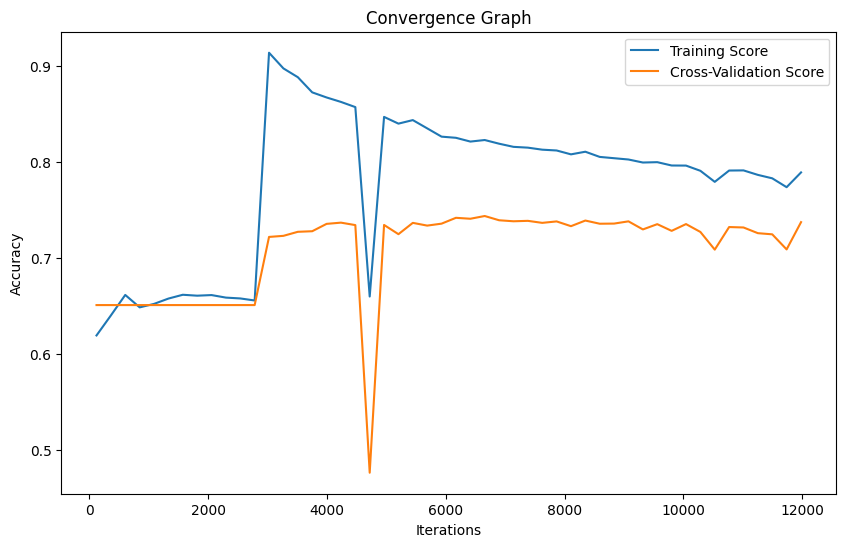

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()